In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import sqlite3
import datetime as dt

### Connect to the Hawaii Database

In [3]:
#connect
conn = sqlite3.connect("Resources/hawaii.sqlite")

In [4]:
#obtain a cursor - something to loop through via database connection
cur = conn.cursor()

In [5]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
#obtain data from cursor via loop - in this case - table names in database file
rows = cur.fetchall()
 
for row in rows:
    print(row)

('measurement',)
('station',)


In [6]:
#obtain details of the schema/table format from table named measurement
cur.execute("SELECT sql FROM sqlite_master WHERE name='measurement'")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('CREATE TABLE measurement (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tdate TEXT, \n\tprcp FLOAT, \n\ttobs FLOAT, \n\tPRIMARY KEY (id)\n)',)


In [7]:
#obtain details of the schema/table format from table named station
cur.execute("SELECT sql FROM sqlite_master WHERE name='station'")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('CREATE TABLE station (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tname TEXT, \n\tlatitude FLOAT, \n\tlongitude FLOAT, \n\televation FLOAT, \n\tPRIMARY KEY (id)\n)',)


In [8]:
#view
cur.execute("SELECT * from measurement limit 10")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [9]:
#view
cur.execute("SELECT * from station limit 10")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [10]:
#view total records
cur.execute("SELECT count(*) from station")
rows = cur.fetchall()
 
for row in rows:
    print(row)
    
#  measurement has 19,500 records
# station has 9 records

(9,)


### Begin Precipitation Analysis

In [11]:
#find the latest date in measurement

cur.execute("SELECT max(date) from measurement")
rows = cur.fetchall()
 
for row in rows:
    print(row)
    
#returns 2017-08-23

('2017-08-23',)


In [12]:
dataToday = cur.execute("SELECT max(date) from measurement")
rows = cur.fetchall()

print (dataToday)
#  ??  Can I make today a variable so it always uses the last date in the dataset as today??

In [ ]:
#Design a query to retrieve the last 12 months of precipitation data.
#Select only the date and prcp values.

#NOTE:    last date in measurement is 2017-08-23
#use this if the data were current:
# cur.execute("SELECT * from measurement where date >= date( julianday(date('now'))-365);")

cur.execute("SELECT date, prcp from measurement where date >= '2016-08-24'")
rows = cur.fetchall()
 
for row in rows:
    print(row)

In [14]:
#Load the query results into a Pandas DataFrame (do this later:  set the index to the date column.)

lastYear = pd.read_sql("SELECT date, prcp from measurement where date >= '2016-08-24'", conn)

In [15]:
lastYear.head(10)

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
5,2016-08-29,0.00
6,2016-08-30,0.00
7,2016-08-31,0.13
8,2016-09-01,0.00
9,2016-09-02,0.00


In [16]:
#Sort the DataFrame values by date.   Sort ascending first by date, then by prcp
lastYear = lastYear.sort_values(['date', 'prcp'], ascending=[True,True])

In [17]:
lastYear.head()

,date,prcp
0,2016-08-24,0.08
1188,2016-08-24,1.22
1875,2016-08-24,1.45
360,2016-08-24,2.15
1524,2016-08-24,2.15


In [18]:
#Make the date the index column
lastYear2 = lastYear.set_index('date')

In [19]:
#manual check
lastYear2.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,1.22
2016-08-24,1.45
2016-08-24,2.15
2016-08-24,2.15


Text(0, 0.5, 'Precipitation (inches)')

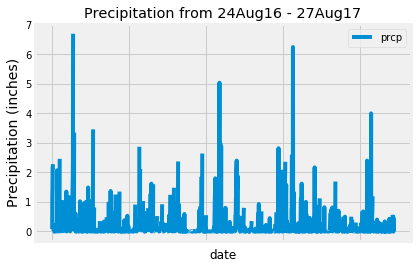

In [20]:
#Plot the results using the DataFrame plot method.
lastYear2.plot()
plt.title("Precipitation from 24Aug16 - 27Aug17")
plt.ylabel('Precipitation (inches)', fontsize=14)

In [21]:
#Use Pandas to print the summary statistics for the precipitation data.

In [22]:
# Create an array that contains the number of users each language has
precip = lastYear["prcp"]
#x_axis = np.arange(len(precip))
x_axis = lastYear["date"]

Text(0, 0.5, 'Precipitation (inches)')

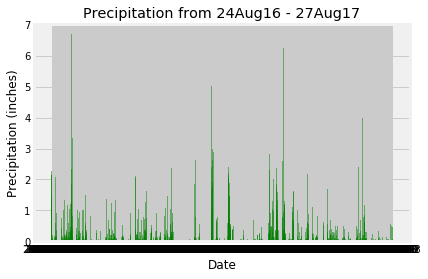

In [23]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, precip, color='g', alpha=0.5, align="center")

# Give our chart some labels and a tile
plt.title("Precipitation from 24Aug16 - 27Aug17")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")

In [24]:
#Use Pandas to print the summary statistics for the precipitation data.
summary = lastYear2["prcp"].describe()

In [25]:
summary.head(20)
#??  answer key shows the summary statistics in a dataframe.  How do I get them in a dataframe?

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

### Station Analysis

In [26]:
# Design a query to calculate the total number of stations.
cur.execute("SELECT count(distinct(station)) FROM station")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(9,)


In [27]:
# BEGIN
#What are the most active stations?

#view the list of columns in the station table
cur.execute("PRAGMA table_info(station)")
rows =  cur.fetchall()

for row in rows:
    print(row)

(0, 'id', 'INTEGER', 1, None, 1)
(1, 'station', 'TEXT', 0, None, 0)
(2, 'name', 'TEXT', 0, None, 0)
(3, 'latitude', 'FLOAT', 0, None, 0)
(4, 'longitude', 'FLOAT', 0, None, 0)
(5, 'elevation', 'FLOAT', 0, None, 0)


In [28]:
#view the list of columns in the measurement table
cur.execute("PRAGMA table_info(measurement)")
rows =  cur.fetchall()

for row in rows:
    print(row)

(0, 'id', 'INTEGER', 1, None, 1)
(1, 'station', 'TEXT', 0, None, 0)
(2, 'date', 'TEXT', 0, None, 0)
(3, 'prcp', 'FLOAT', 0, None, 0)
(4, 'tobs', 'FLOAT', 0, None, 0)


In [ ]:
cur.execute("SELECT * FROM measurement")
rows = cur.fetchall()
 
for row in rows:
    print(row)

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

cur.execute("SELECT s.station, s.name, count(m.station) from station as s inner join measurement as m on s.station = m.station group by s.station order by count(m.station) desc")
rows = cur.fetchall()
 
for row in rows:
    print(row)


('USC00519281', 'WAIHEE 837.5, HI US', 2772)
('USC00519397', 'WAIKIKI 717.2, HI US', 2724)
('USC00513117', 'KANEOHE 838.1, HI US', 2709)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979)
('USC00517948', 'PEARL CITY, HI US', 1372)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)


In [31]:
#For easy viewing, create a dataframe
stationActive = pd.read_sql("SELECT s.station as stationID, s.name as stationName, count(m.station) as activityCount from station as s inner join measurement as m on s.station = m.station group by s.station order by count(m.station) desc", conn)
stationActive.head(10)

,stationID,stationName,activityCount
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [34]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'session' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
